### KELOMPOK 5

Auryno Nagata Adyatma / 4 (2041720126)

Irba Adika Jaya / 12 (2041720175)

Nicola Arieska Fonda / 18 (2041720220)

Primo Afga Parlevi / 20 (2041720021)

# Pengambilan Data 
Scrapping data twitter pada akun College Menfest

In [ ]:
#Intall Library Twint 
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
!pip install aiohttp==3.7.0
!pip install nest_asyncio

fatal: destination path 'twint' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38870 sha256=38f25b4b0515bde08d5bd6c072cddff2354a2a569d05b473c710da58dc8f4c71
  Stored in directory: /tmp/pip-ephem-wheel-cache-fsb1qhez/wheels/a9/70/09/93062f64eee119ab310a33bae425d98678f627d1dc1b667e8f
Successfully built twint
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.

In [ ]:
# Import Libraries
import twint
import nest_asyncio
nest_asyncio.apply()
import time
import pandas as pd
import os
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#configuration
c = twint.Config()
# c.Since = "2022-12-5"
# c.Until = "2022-12-27"   
c.Limit = 5000    
c.Username = "collegemenfess"   
c.Lang = "en"
c.Store_csv = True
c.Output = "user.csv"
twint.run.Search(c)

1607978677928853504 2022-12-28 05:56:06 +0000 <collegemenfess> [cm] kalo service laptop mending ke Official storenya atau tukang service biasa? Kebetulan laptop sender merk H*p ada gaa official storenya di daerah bogor atau jakarta?
1607978670584639493 2022-12-28 05:56:04 +0000 <collegemenfess> [cm] halo, ada anak univ sumatera utara ngga yaa? boleh minta tolong download repository, butuh bgt. makasih🙏🏻
1607978646689701890 2022-12-28 05:55:58 +0000 <collegemenfess> [cm] lagi liburan gini takut banget ninggalin kost, takut tiba-tiba jadi ruko m1xue
1607978630155587584 2022-12-28 05:55:54 +0000 <collegemenfess> [cm] contoh program pembangunan pemerintah dengan pendekatan top down yang baru baru ini apa aja ya?
1607978622064947200 2022-12-28 05:55:52 +0000 <collegemenfess> [cm] kalian yg libur semester ada yg kerja ga? info dong, gaenak bgt karna banyak pengeluaran, blm bayar ukt, kosan, ongkos balik, duhhhhh🥹  https://t.co/Gt9b10pAAu
1607978485909458944 2022-12-28 05:55:20 +0000 <college

In [ ]:
#Pembacaan dan load data yang telah didapatkan
df = pd.read_csv('user.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1607977870269505537,1607977870269505537,2022-12-28 05:52:53 UTC,2022-12-28,05:52:53,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1607977807539494912,1607977807539494912,2022-12-28 05:52:38 UTC,2022-12-28,05:52:38,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1607977190393810945,1607977190393810945,2022-12-28 05:50:11 UTC,2022-12-28,05:50:11,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1607976923501858823,1607976923501858823,2022-12-28 05:49:07 UTC,2022-12-28,05:49:07,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1607976605011554304,1607976605011554304,2022-12-28 05:47:52 UTC,2022-12-28,05:47:52,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


# Preprocesing data 


In [ ]:
#Cek kelengkapan data(menampilkan semua data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   conversation_id  10000 non-null  int64  
 2   created_at       10000 non-null  object 
 3   date             10000 non-null  object 
 4   time             10000 non-null  object 
 5   timezone         10000 non-null  int64  
 6   user_id          10000 non-null  int64  
 7   username         10000 non-null  object 
 8   name             10000 non-null  object 
 9   place            0 non-null      float64
 10  tweet            10000 non-null  object 
 11  language         10000 non-null  object 
 12  mentions         10000 non-null  object 
 13  urls             10000 non-null  object 
 14  photos           10000 non-null  object 
 15  replies_count    10000 non-null  int64  
 16  retweets_count   10000 non-null  int64  
 17  likes_count  

In [ ]:
#DROP KOLOM yang tidak digunakan
df = df.drop(df.iloc[:,1:10], axis=1)
df = df.drop(df.iloc[:,2:], axis=1)
df = df.drop(df.columns[0], axis=1)
df.head()

,tweet
0,"[cm] gais, data di pddikti bisa salah ga? Ini ..."
1,syarat korelasi pearson bisa pakai uji normali...
2,[cm] temen temen yang udah pernah ikut program...
3,"[cm] gais, cakabem emng sesibuk itu ya? inj la..."
4,"[cm] gess seriusan dah, emang dosen-dosen di k..."


In [ ]:
#CASE FOLDING :Pengubahan Huruf besar ke huruf kecil 
def clean_lower(lwr):
    lwr = lwr.lower() # mengubah menjadi lowercase text
    return lwr

#Tokenizing : penghapusan symbol (@, '', "", dll)
#Remove
clean_spcl = re.compile('[/(){}\[\]\|@,;][c][m]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

#Tokenizing : Penghapusan Spasi yang berlebihan 
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

#Membuat kolom baru untuk hasil konten yang telah dilakukan preprocesing
df['hasil_tweet'] = df['tweet'].apply(clean_lower).apply(clean_punct).apply(_normalize_whitespace)

df.head()


,tweet,hasil_tweet
0,"[cm] gais, data di pddikti bisa salah ga? Ini ...",gais data di pddikti bisa salah ga ini aku lag...
1,syarat korelasi pearson bisa pakai uji normali...,syarat korelasi pearson bisa pakai uji normali...
2,[cm] temen temen yang udah pernah ikut program...,temen temen yang udah pernah ikut program ment...
3,"[cm] gais, cakabem emng sesibuk itu ya? inj la...",gais cakabem emng sesibuk itu ya inj lagi ada ...
4,"[cm] gess seriusan dah, emang dosen-dosen di k...",gess seriusan dah emang dosen dosen di kampus ...


# Clustering


In [ ]:
!pip install vaderSentiment

# Melakukan Kluster dengan dilihat dari nilai polarity, dimana nilai polariti didapatkan menggunakan perhitungan 
# yg menggunakan library SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

tokens = df['hasil_tweet']

def category_sentiment(tokens):
    return TextBlob(tokens).sentiment

analyser = SentimentIntensityAnalyzer()

def category_sentiment_analyser(tokens):    
    return analyser.polarity_scores(tokens)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#proses sentiment analysis

df['category']=df.hasil_tweet.apply(category_sentiment)
df['category_analyser']=df.hasil_tweet.apply(category_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(df)),columns= ['compound_score','compound_score_category'])

for i in range(0,len(df)): 
  s['compound_score'][i] = df['category_analyser'][i]['compound']
  
  if (df['category_analyser'][i]['compound'] < 0):
    s['compound_score_category'][i] = 'Negative'    
  if (df['category_analyser'][i]['compound'] > 0):
    s['compound_score_category'][i] = 'Positive'
  if (df['category_analyser'][i]['compound'] == 0):
    s['compound_score_category'][i] = 'Neutral'
    
df['compound_score'] = s['compound_score']
df['compound_score_category'] = s['compound_score_category']
df.head()

,tweet,hasil_tweet,category,category_analyser,compound_score,compound_score_category
0,"[cm] gais, data di pddikti bisa salah ga? Ini ...",gais data di pddikti bisa salah ga ini aku lag...,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
1,syarat korelasi pearson bisa pakai uji normali...,syarat korelasi pearson bisa pakai uji normali...,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
2,[cm] temen temen yang udah pernah ikut program...,temen temen yang udah pernah ikut program ment...,"(0.4, 0.55)","{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'comp...",0.7351,Positive
3,"[cm] gais, cakabem emng sesibuk itu ya? inj la...",gais cakabem emng sesibuk itu ya inj lagi ada ...,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
4,"[cm] gess seriusan dah, emang dosen-dosen di k...",gess seriusan dah emang dosen dosen di kampus ...,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral


In [ ]:
# Memilih Data mana saja yang akan digunakan
df = pd.DataFrame({
    'hasil_tweet' : df['hasil_tweet'],
    'tipe_komentar' : df['compound_score_category']
})
df.head()

,hasil_tweet,tipe_komentar
0,gais data di pddikti bisa salah ga ini aku lag...,Neutral
1,syarat korelasi pearson bisa pakai uji normali...,Neutral
2,temen temen yang udah pernah ikut program ment...,Positive
3,gais cakabem emng sesibuk itu ya inj lagi ada ...,Neutral
4,gess seriusan dah emang dosen dosen di kampus ...,Neutral


In [ ]:
#Mengubah data kategorik sentiment menjadi data numerik 
encode = LabelEncoder()
content = encode.fit_transform(df['tipe_komentar'])
df['Label']  = pd.DataFrame(content)
df.head()

,hasil_tweet,tipe_komentar,Label
0,gais data di pddikti bisa salah ga ini aku lag...,Neutral,1
1,syarat korelasi pearson bisa pakai uji normali...,Neutral,1
2,temen temen yang udah pernah ikut program ment...,Positive,2
3,gais cakabem emng sesibuk itu ya inj lagi ada ...,Neutral,1
4,gess seriusan dah emang dosen dosen di kampus ...,Neutral,1


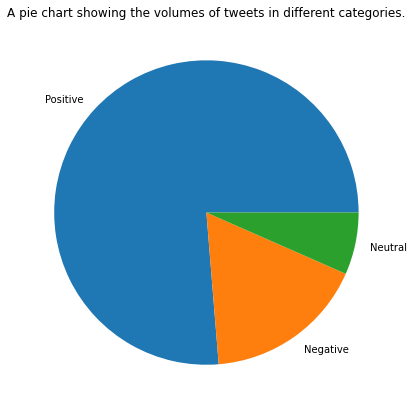

In [ ]:
# visualisasi menggunakan pie chart
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7)) 
plt.pie(df['tipe_komentar'].value_counts(), labels = ["Positive","Negative","Neutral"])
plt.title('A pie chart showing the volumes of tweets in different categories.')
plt.show()

# Klasifikasi 

In [ ]:
# #Memisahkan Fitur dengan Label
X = df['hasil_tweet'].values
y = df['Label'].values

In [ ]:
#EKSTRASI FITUR
#Ekstrasi Fitur yang saya gunakan adalah konsep Bag of Words dengan menggunakan fungsi CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer(stop_words='english')

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
X_test = bow.transform(X_test)

In [ ]:
#TRAINING DAN EVALUASI MODEL
#Model yang saya gunakan adalah Algoritma Decisien Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
dt = DecisionTreeClassifier()

# Fit model
dt.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = dt.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = dt.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')


Hasil akurasi data train: 1.0
Hasil akurasi data test: 0.984


In [ ]:
#Melakukan Evaluasi dengan confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       117
           1       0.99      1.00      0.99      1514
           2       0.98      0.94      0.96       369

    accuracy                           0.98      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.98      0.98      0.98      2000



Kesimpulan : 

Model Klasifikasi yang dibuat merupakan model yang tergolong bagus karena akurasi yang dihasilkan sebesar 98 %

# Prediksi sentimen data twitter yang baru

In [ ]:
# Mengambil Data Baru
c = twint.Config() 
c.Limit = 500    
c.Username = "collegemenfess"   
c.Lang = "en"        # Language
c.Store_csv = True
c.Output ="data_baru.csv"
twint.run.Search(c)

1607979335125983233 2022-12-28 05:58:42 +0000 <collegemenfess> [cm] gimana cara nya nangis pas lagi struggle banget sama kuliah? Sender udh di tahap yg stress banget tp gabisa nangis.. pls, gue gamau jd gila 😭
1607978677928853504 2022-12-28 05:56:06 +0000 <collegemenfess> [cm] kalo service laptop mending ke Official storenya atau tukang service biasa? Kebetulan laptop sender merk H*p ada gaa official storenya di daerah bogor atau jakarta?
1607978670584639493 2022-12-28 05:56:04 +0000 <collegemenfess> [cm] halo, ada anak univ sumatera utara ngga yaa? boleh minta tolong download repository, butuh bgt. makasih🙏🏻
1607978646689701890 2022-12-28 05:55:58 +0000 <collegemenfess> [cm] lagi liburan gini takut banget ninggalin kost, takut tiba-tiba jadi ruko m1xue
1607978630155587584 2022-12-28 05:55:54 +0000 <collegemenfess> [cm] contoh program pembangunan pemerintah dengan pendekatan top down yang baru baru ini apa aja ya?
1607978622064947200 2022-12-28 05:55:52 +0000 <collegemenfess> [cm] kali

In [ ]:
#Pembacaan dan load data yang telah didapatkan
df = pd.read_csv('data_baru.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1607978485909458944,1607978485909458944,2022-12-28 05:55:20 UTC,2022-12-28,05:55:20,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1607977870269505537,1607977870269505537,2022-12-28 05:52:53 UTC,2022-12-28,05:52:53,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1607977807539494912,1607977807539494912,2022-12-28 05:52:38 UTC,2022-12-28,05:52:38,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1607977190393810945,1607977190393810945,2022-12-28 05:50:11 UTC,2022-12-28,05:50:11,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1607976923501858823,1607976923501858823,2022-12-28 05:49:07 UTC,2022-12-28,05:49:07,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
#DROP KOLOM yang tidak digunakan
df = df.drop(df.iloc[:,1:10], axis=1)
df = df.drop(df.iloc[:,2:], axis=1)
df = df.drop(df.columns[0], axis=1)
df.head()

,tweet
0,[cm] ini aku gatau apa aku yg emang lemot tapi...
1,"[cm] gais, data di pddikti bisa salah ga? Ini ..."
2,syarat korelasi pearson bisa pakai uji normali...
3,[cm] temen temen yang udah pernah ikut program...
4,"[cm] gais, cakabem emng sesibuk itu ya? inj la..."


In [ ]:
#Membuat kolom baru untuk hasil konten yang telah dilakukan preprocesing
df['hasil_tweet_baru'] = df['tweet'].apply(clean_lower).apply(clean_punct).apply(_normalize_whitespace)

df.head()

,tweet,hasil_tweet_baru
0,[cm] ini aku gatau apa aku yg emang lemot tapi...,ini aku gatau apa aku yg emang lemot tapi kok ...
1,"[cm] gais, data di pddikti bisa salah ga? Ini ...",gais data di pddikti bisa salah ga ini aku lag...
2,syarat korelasi pearson bisa pakai uji normali...,syarat korelasi pearson bisa pakai uji normali...
3,[cm] temen temen yang udah pernah ikut program...,temen temen yang udah pernah ikut program ment...
4,"[cm] gais, cakabem emng sesibuk itu ya? inj la...",gais cakabem emng sesibuk itu ya inj lagi ada ...


In [ ]:
!pip install vaderSentiment
#import library 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#memberi skor individu untuk semua kata

tokens = df['hasil_tweet_baru']

def category_sentiment(tokens):
    return TextBlob(tokens).sentiment


analyser = SentimentIntensityAnalyzer()

def category_sentiment_analyser(tokens):    
    return analyser.polarity_scores(tokens)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#proses sentiment analysis
df['category']=df.hasil_tweet_baru.apply(category_sentiment)
df['category_analyser']=df.hasil_tweet_baru.apply(category_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(df)),columns= ['compound_score','compound_score_category'])

for i in range(0,len(df)): 
  s['compound_score'][i] = df['category_analyser'][i]['compound']
  
  if (df['category_analyser'][i]['compound'] < 0):
    s['compound_score_category'][i] = 'Negative'    
  if (df['category_analyser'][i]['compound'] > 0):
    s['compound_score_category'][i] = 'Positive'
  if (df['category_analyser'][i]['compound'] == 0):
    s['compound_score_category'][i] = 'Neutral'
    
df['compound_score'] = s['compound_score']
df['compound_score_category'] = s['compound_score_category']
df.head()


,tweet,hasil_tweet_baru,category,category_analyser,compound_score,compound_score_category
0,[cm] ini aku gatau apa aku yg emang lemot tapi...,ini aku gatau apa aku yg emang lemot tapi kok ...,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
1,"[cm] gais, data di pddikti bisa salah ga? Ini ...",gais data di pddikti bisa salah ga ini aku lag...,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
2,syarat korelasi pearson bisa pakai uji normali...,syarat korelasi pearson bisa pakai uji normali...,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
3,[cm] temen temen yang udah pernah ikut program...,temen temen yang udah pernah ikut program ment...,"(0.4, 0.55)","{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'comp...",0.7351,Positive
4,"[cm] gais, cakabem emng sesibuk itu ya? inj la...",gais cakabem emng sesibuk itu ya inj lagi ada ...,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral


In [ ]:
# Memilih Data mana saja yang akan digunakan
df = pd.DataFrame({
    'hasil_tweet_baru' : df['hasil_tweet_baru'],
    'tipe_komentar' : df['compound_score_category']
})
df.head()

,hasil_tweet_baru,tipe_komentar
0,ini aku gatau apa aku yg emang lemot tapi kok ...,Neutral
1,gais data di pddikti bisa salah ga ini aku lag...,Neutral
2,syarat korelasi pearson bisa pakai uji normali...,Neutral
3,temen temen yang udah pernah ikut program ment...,Positive
4,gais cakabem emng sesibuk itu ya inj lagi ada ...,Neutral


In [ ]:
#Mengubah dara kategorik sentiment menjadi data numerik 
encode = LabelEncoder()
content = encode.fit_transform(df['tipe_komentar'])
df['Label']  = pd.DataFrame(content)
df.head()

,hasil_tweet_baru,tipe_komentar,Label
0,ini aku gatau apa aku yg emang lemot tapi kok ...,Neutral,1
1,gais data di pddikti bisa salah ga ini aku lag...,Neutral,1
2,syarat korelasi pearson bisa pakai uji normali...,Neutral,1
3,temen temen yang udah pernah ikut program ment...,Positive,2
4,gais cakabem emng sesibuk itu ya inj lagi ada ...,Neutral,1


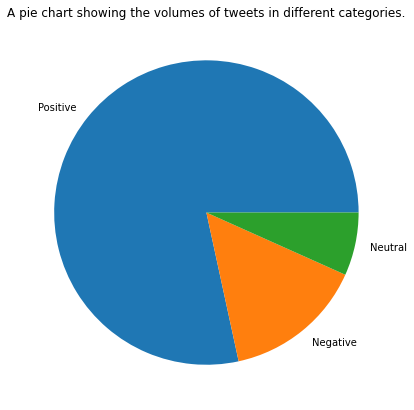

In [ ]:
# visualisasi menggunakan pie chart
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7)) 
plt.pie(df['tipe_komentar'].value_counts(), labels = ["Positive","Negative","Neutral"])
plt.title('A pie chart showing the volumes of tweets in different categories.')
plt.show()

In [ ]:
# #Memisahkan Fitur dengan Label
X = df['hasil_tweet_baru'].values
y = df['Label'].values

In [ ]:
#EKSTRASI FITUR
#Ekstrasi Fitur yang saya gunakan adalah konsep Bag of Words dengan menggunakan fungsi CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer(stop_words='english')

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
X_test = bow.transform(X_test)

In [ ]:
#TRAINING DAN EVALUASI MODEL
#Model yang saya gunakan adalah Algoritma Decisien Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
dt = DecisionTreeClassifier()

# Fit model
dt.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = dt.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = dt.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')


Hasil akurasi data train: 1.0
Hasil akurasi data test: 0.98


In [ ]:
#Melakukan Evaluasi dengan confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.99      0.99      0.99       158
           2       1.00      1.00      1.00        30

    accuracy                           0.98       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.98      0.98      0.98       200



Kesimpulan : 

Model Klasifikasi yang dibuat dilakukan prediksi dengan data baru dan hasil akurasinya adalah 98 %